In [1]:
import pandas as pd
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

## Step #1

In [2]:
data = pd.read_excel("dataset.xls")
data_furn = data[data['Category'] == 'Furniture'][['Order Date', 'Sales']]
data_supp = data[data['Category'] == 'Office Supplies'][['Order Date', 'Sales']]

data_furn['Year'] = data['Order Date'].dt.year
data_supp['Year'] = data['Order Date'].dt.year

data_furn['Month'] = data_furn['Order Date'].dt.month
data_supp['Month'] = data_supp['Order Date'].dt.month

data_furn['Date'] = [datetime(i, j, 1) for (i, j) in zip(data_furn['Year'], data_furn['Month'])]
data_supp['Date'] = [datetime(i, j, 1) for (i, j) in zip(data_supp['Year'], data_supp['Month'])]




In [3]:
data_furn.head()

,Order Date,Sales,Year,Month,Date
7,2014-01-06,2573.820,2014,1,2014-01-01
14,2014-01-07,76.728,2014,1,2014-01-01
19,2014-01-10,51.940,2014,1,2014-01-01
20,2014-01-11,9.940,2014,1,2014-01-01
26,2014-01-13,545.940,2014,1,2014-01-01


In [4]:
data_supp.head()

,Order Date,Sales,Year,Month,Date
0,2014-01-03,16.448,2014,1,2014-01-01
1,2014-01-04,11.784,2014,1,2014-01-01
2,2014-01-04,272.736,2014,1,2014-01-01
3,2014-01-04,3.540,2014,1,2014-01-01
4,2014-01-05,19.536,2014,1,2014-01-01


In [5]:
data_furn = data_furn[['Date' , 'Sales']].groupby(data_furn['Date']).sum()
data_supp = data_supp[['Date' , 'Sales']].groupby(data_supp['Date']).sum()

In [6]:
data_furn.head()

,Sales
Date,
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837
2014-05-01,6912.787


In [7]:
data_supp.head()

,Sales
Date,
2014-01-01,4851.080
2014-02-01,1071.724
2014-03-01,8605.879
2014-04-01,11155.074
2014-05-01,7135.624


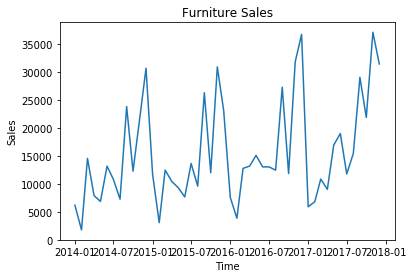

In [8]:
plt.plot(data_furn)
plt.title("Furniture Sales")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.show()

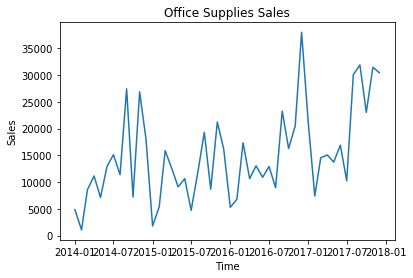

In [9]:
plt.plot(data_supp)
plt.title("Office Supplies Sales")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.show()

## Step #2 

In [10]:
furn_2018_sales=np.zeros(12)
supp_2018_sales=np.zeros(12)

In [11]:
data_furn['Moving Average'] = data_furn['Sales'].rolling(window=5).mean()

In [12]:
data_furn.head()

,Sales,Moving Average
Date,,
2014-01-01,6242.525,NaN
2014-02-01,1839.658,NaN
2014-03-01,14573.956,NaN
2014-04-01,7944.837,NaN
2014-05-01,6912.787,7502.7526


In [13]:
data_supp['Moving Average'] = data_supp['Sales'].rolling(window=5).mean()

In [14]:
data_supp.head()

,Sales,Moving Average
Date,,
2014-01-01,4851.080,NaN
2014-02-01,1071.724,NaN
2014-03-01,8605.879,NaN
2014-04-01,11155.074,NaN
2014-05-01,7135.624,6563.8762


In [15]:
c = 0
s = 0
for index , row in data_furn.iterrows():
    c = c+1
    if c >= 45:
        s = s + row["Sales"]
        
furn_2018_sales[:] = s/4

In [16]:
c = 0
s = 0
for index , row in data_supp.iterrows():
    c = c+1
    if c >= 45:
        s = s + row["Sales"]
        
supp_2018_sales[:] = s/4

In [17]:
data_furn['α=0.1'] = data_furn['Sales'].ewm(alpha=0.1, adjust=False).mean()
data_furn.head()

,Sales,Moving Average,α=0.1
Date,,,
2014-01-01,6242.525,NaN,6242.525000
2014-02-01,1839.658,NaN,5802.238300
2014-03-01,14573.956,NaN,6679.410070
2014-04-01,7944.837,NaN,6805.952763
2014-05-01,6912.787,7502.7526,6816.636187


In [18]:
data_furn['α=0.5'] = data_furn['Sales'].ewm(alpha=0.5, adjust=False).mean()
data_furn.head()

,Sales,Moving Average,α=0.1,α=0.5
Date,,,,
2014-01-01,6242.525,NaN,6242.525000,6242.525000
2014-02-01,1839.658,NaN,5802.238300,4041.091500
2014-03-01,14573.956,NaN,6679.410070,9307.523750
2014-04-01,7944.837,NaN,6805.952763,8626.180375
2014-05-01,6912.787,7502.7526,6816.636187,7769.483688


In [19]:
data_supp['α=0.1'] = data_supp['Sales'].ewm(alpha=0.1, adjust=False).mean()
data_supp.head()

,Sales,Moving Average,α=0.1
Date,,,
2014-01-01,4851.080,NaN,4851.080000
2014-02-01,1071.724,NaN,4473.144400
2014-03-01,8605.879,NaN,4886.417860
2014-04-01,11155.074,NaN,5513.283474
2014-05-01,7135.624,6563.8762,5675.517527


In [20]:
data_supp['α=0.5'] = data_supp['Sales'].ewm(alpha=0.5, adjust=False).mean()
data_supp.head()

,Sales,Moving Average,α=0.1,α=0.5
Date,,,,
2014-01-01,4851.080,NaN,4851.080000,4851.080000
2014-02-01,1071.724,NaN,4473.144400,2961.402000
2014-03-01,8605.879,NaN,4886.417860,5783.640500
2014-04-01,11155.074,NaN,5513.283474,8469.357250
2014-05-01,7135.624,6563.8762,5675.517527,7802.490625


In [21]:
furn_2018_sales2_alpa1=np.zeros(12)
supp_2018_sales2_alpa1=np.zeros(12)
furn_2018_sales2_alpa2=np.zeros(12)
supp_2018_sales2_alpa2=np.zeros(12)

In [22]:
yt = 0
ft1 = 0
ft2 = 0
c = 0
for index , row in data_furn.iterrows():
    c = c +1 
    if c == 48:
        yt = row["Sales"]
        ft1 = row["α=0.1"]
        ft2 = row["α=0.5"]

In [23]:
furn_2018_sales2_alpa1[:] = 0.1*yt + 0.9*ft1
furn_2018_sales2_alpa2[:] = 0.5*yt + 0.5*ft2

In [24]:
yt = 0
ft1 = 0
ft2 = 0
c = 0
for index , row in data_supp.iterrows():
    c = c +1 
    if c == 48:
        yt = row["Sales"]
        ft1 = row["α=0.1"]
        ft2 = row["α=0.5"]

In [25]:
supp_2018_sales2_alpa1[:] = 0.1*yt + 0.9*ft1
supp_2018_sales2_alpa2[:] = 0.5*yt + 0.5*ft2

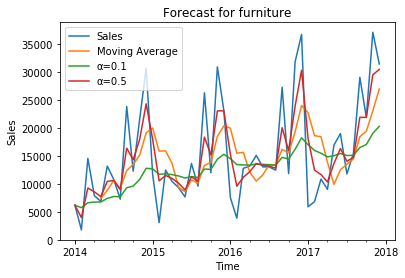

In [26]:
data_furn.plot()
plt.ylabel("Sales")
plt.xlabel("Time")
plt.title("Forecast for furniture")
plt.show()

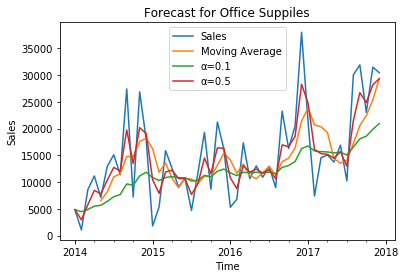

In [27]:
data_supp.plot()
plt.ylabel("Sales")
plt.xlabel("Time")
plt.title("Forecast for Office Suppiles")
plt.show()

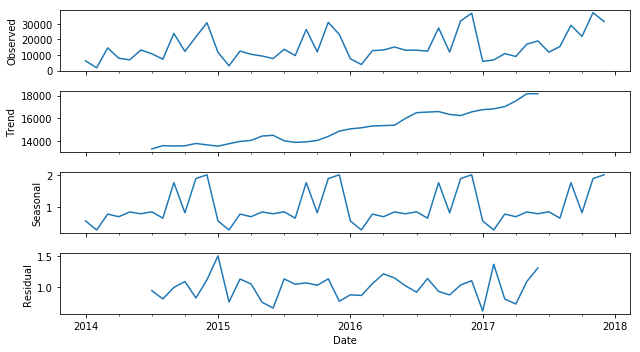

In [28]:
rcParams['figure.figsize'] = 9, 5
decomposition = seasonal_decompose(data_furn['Sales'], model='multiplicative')
fig = decomposition.plot()
plt.show()

In [38]:
df_decomposition = pd.concat([decomposition.seasonal, decomposition.trend, decomposition.resid, decomposition.observed], axis=1)
df_decomposition.columns = ['seas', 'trend', 'resid', 'actual_values']
df_decomposition["forcast"] = df_decomposition["seas"] * df_decomposition["trend"] * df_decomposition["resid"]
df_decomposition.head(10)

,seas,trend,resid,actual_values,forcast
Date,,,,,
2014-01-01,0.574453,NaN,NaN,6242.5250,NaN
2014-02-01,0.297418,NaN,NaN,1839.6580,NaN
2014-03-01,0.788004,NaN,NaN,14573.9560,NaN
2014-04-01,0.705844,NaN,NaN,7944.8370,NaN
2014-05-01,0.853206,NaN,NaN,6912.7870,NaN
2014-06-01,0.796706,NaN,NaN,13206.1256,NaN
2014-07-01,0.857910,13328.463450,0.946340,10821.0510,10821.0510
2014-08-01,0.660678,13611.468975,0.814023,7320.3465,7320.3465
2014-09-01,1.757303,13578.991600,0.998076,23816.4808,23816.4808


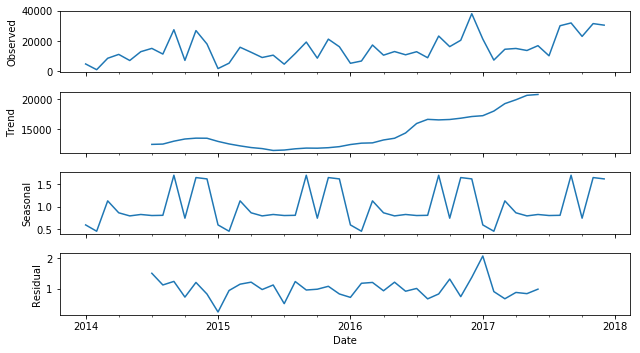

In [29]:
rcParams['figure.figsize'] = 9, 5
decomposition2 = seasonal_decompose(data_supp['Sales'], model='multiplicative')
fig = decomposition2.plot()
plt.show()

In [51]:
df_decomposition2 = pd.concat([decomposition2.seasonal, decomposition2.trend, decomposition2.resid, decomposition2.observed], axis=1)
df_decomposition2.columns = ['seas', 'trend', 'resid', 'actual_values']
df_decomposition2.head()
df_decomposition2["forcast"] = df_decomposition2["seas"] * df_decomposition2["trend"] * df_decomposition2["resid"]
df_decomposition2.head(10)

,seas,trend,resid,actual_values,forcast
Date,,,,,
2014-01-01,0.595389,NaN,NaN,4851.080,NaN
2014-02-01,0.454967,NaN,NaN,1071.724,NaN
2014-03-01,1.130893,NaN,NaN,8605.879,NaN
2014-04-01,0.865263,NaN,NaN,11155.074,NaN
2014-05-01,0.796124,NaN,NaN,7135.624,NaN
2014-06-01,0.827814,NaN,NaN,12953.037,NaN
2014-07-01,0.804604,12521.271833,1.500914,15121.208,15121.208
2014-08-01,0.809386,12573.523625,1.118173,11379.462,11379.462
2014-09-01,1.701270,13055.732417,1.234654,27423.298,27423.298



## Step #3

In [30]:
def MSE(yt, ft):
    return mean((yt - ft) ** 2)


def MAPE(yt, ft):
    return mean(abs(yt - ft) / yt)


def LAD(yt, ft):
    return max(abs(yt - ft))

In [67]:
print(MSE(data_furn['Sales'].iloc[4:], data_furn['Moving Average'].iloc[4:]))
print(MSE(data_furn['Sales'], data_furn['α=0.1']))
print(MSE(data_furn['Sales'], data_furn['α=0.5']))
print(MSE(df_decomposition['actual_values'].iloc[8:], df_decomposition["forcast"].iloc[8:]))
      
    
print(MSE(data_supp['Sales'].iloc[4:], data_supp['Moving Average'].iloc[4:]))
print(MSE(data_supp['Sales'], data_supp['α=0.1']))
print(MSE(data_supp['Sales'], data_supp['α=0.5']))
print(MSE(df_decomposition2['actual_values'].iloc[8:], df_decomposition2["forcast"].iloc[8:]))

59590251.45285188
66472795.62369701
20412909.269498646
nan
42910148.23829201
54129334.48137161
15686853.279430183
nan


In [68]:
print(MAPE(data_furn['Sales'].iloc[4:], data_furn['Moving Average'].iloc[4:]))
print(MAPE(data_furn['Sales'], data_furn['α=0.1']))
print(MAPE(data_furn['Sales'], data_furn['α=0.5']))
print(MAPE(df_decomposition['actual_values'].iloc[8:], df_decomposition["forcast"].iloc[8:]))



print(MAPE(data_supp['Sales'].iloc[4:], data_supp['Moving Average'].iloc[4:]))
print(MAPE(data_supp['Sales'], data_supp['α=0.1']))
print(MAPE(data_supp['Sales'], data_supp['α=0.5']))
print(MAPE(df_decomposition2['actual_values'].iloc[8:], df_decomposition2["forcast"].iloc[8:]))


0.5317948306837929
0.4708648483814236
0.32122629909908396
nan
0.5285830270800875
0.520674726560441
0.3492183448085996
nan


In [69]:
print(LAD(data_furn['Sales'].iloc[4:], data_furn['Moving Average'].iloc[4:]))
print(LAD(data_furn['Sales'], data_furn['α=0.1']))
print(LAD(data_furn['Sales'], data_furn['α=0.1']))
print(LAD(df_decomposition['actual_values'].iloc[8:], df_decomposition["forcast"].iloc[8:]))

print(LAD(data_supp['Sales'].iloc[4:], data_supp['Moving Average'].iloc[4:]))
print(LAD(data_supp['Sales'], data_supp['α=0.1']))
print(LAD(data_supp['Sales'], data_supp['α=0.1']))
print(LAD(df_decomposition2['actual_values'].iloc[8:], df_decomposition2["forcast"].iloc[8:]))

16748.33473999999
18428.154291698833
18428.154291698833
3.637978807091713e-12
16599.542800000017
21739.692796747644
21739.692796747644
3.637978807091713e-12


In [70]:
from sklearn.linear_model import LinearRegression

In [73]:
model_1 = LinearRegression()

In [107]:
X = np.array(33)
model_1.fit(X , np.array(df_decomposition.trend.iloc[8:42]))

ValueError: Found input variables with inconsistent numbers of samples: [1, 34]

In [101]:
type(df_decomposition.trend.iloc[8:42])


pandas.core.series.Series

In [105]:
np.array(df_decomposition.trend.iloc[8:42])

array([13578.9916    , 13598.0202875 , 13806.06299583, 13679.82203333,
       13569.8813    , 13785.36524583, 13984.31474167, 14075.10302083,
       14451.70036667, 14524.85922083, 14038.30314167, 13899.71890833,
       13945.23915833, 14071.8100125 , 14425.1965125 , 14887.74974167,
       15085.68690833, 15178.96770417, 15338.73845417, 15373.56392917,
       15404.7618375 , 16008.74900833, 16506.00670833, 16559.42651667,
       16602.47398333, 16350.2331875 , 16254.04949167, 16578.03857083,
       16773.143475  , 16844.1078375 , 17040.9397875 , 17531.64046667,
       18168.49785833, 18168.57444167])